In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, ZeroPadding2D, Dropout, MaxPool2D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.utils import to_categorical, plot_model
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import os

# Get the current working directory
current_dir = os.getcwd()
print(f"Current working directory: {current_dir}")

In [ ]:
data_genarator_train = ImageDataGenerator(
    rescale = 1.0/255.0,
    zoom_range = 0.4,
    horizontal_flip = True,
    vertical_flip = True,
    rotation_range = 50,
    width_shift_range = 0.3,
    height_shift_range = 0.3,
    shear_range = 0.4,
    fill_mode = 'nearest'
)

data_genarator_test = ImageDataGenerator(
    rescale = 1/255.0
)


In [ ]:
train = data_genarator_train.flow_from_directory(
    'c:/Programming/ML/machine-learning/box_assigner/chest_xray/train',
    target_size=(500,500),
    color_mode = 'grayscale',
    class_mode='binary', 
    batch_size=20
    )

In [ ]:
validation = data_genarator_train.flow_from_directory(
    'c:/Programming/ML/machine-learning/box_assigner/chest_xray/val',
    target_size=(500,500),
    color_mode = 'grayscale',
    class_mode='binary', 
    batch_size=20
    )

In [ ]:
test = data_genarator_test.flow_from_directory(
    'c:/Programming/ML/machine-learning/box_assigner/chest_xray/test',
    target_size=(500,500),
    color_mode = 'grayscale',
    class_mode='binary', 
    batch_size=20
    )

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation='relu', input_shape=(500,500,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(32,(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

In [ ]:
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics= ['accuracy'])

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=False, show_layer_activations=True, show_trainable=True, show_dtype=True)

In [ ]:
train.classes

In [ ]:
weights = compute_class_weight(class_weight='balanced', classes=np.unique(train.classes), y=train.classes)
weights

In [ ]:
class_weights = dict(zip(np.unique(train.classes), weights))
class_weights

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', patience=3)
rlrop = ReduceLROnPlateau(monitor='val_loss', patience=2, factor=0.2, min_lr=0.001)
mch = ModelCheckpoint('chest_xray.keras', monitor='val_loss', mode='min', save_best_only=True)

In [ ]:
result = model.fit(train, steps_per_epoch = len(train), validation_data = test, validation_steps = len(test), epochs = 6, callbacks=[es,rlrop,mch], class_weight=class_weights)

In [ ]:
import matplotlib.pyplot as plt

plt.plot(result.history['accuracy'], color='green')
plt.plot(result.history['val_accuracy'], color='blue')
plt.plot(result.history['loss'], color='red')
plt.plot(result.history['val_loss'], color='black')
plt.show()



# keras.saving.save_model(model, 'catvsdog.keras')

In [8]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

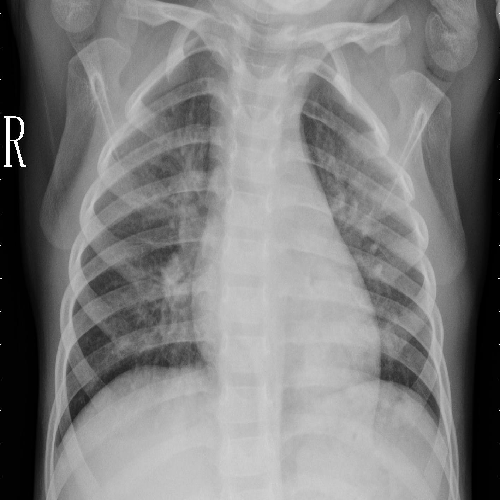

In [11]:
img = load_img('c:/Programming/ML/machine-learning/box_assigner/chest_xray/val/PNEUMONIA/person1949_bacteria_4880.jpeg', target_size=(500,500), color_mode='grayscale')
img

In [12]:
img = img_to_array(img)
img

array([[[  0.],
        [  0.],
        [  0.],
        ...,
        [107.],
        [118.],
        [135.]],

       [[  0.],
        [  0.],
        [  0.],
        ...,
        [ 96.],
        [122.],
        [133.]],

       [[  0.],
        [  0.],
        [  0.],
        ...,
        [ 95.],
        [131.],
        [138.]],

       ...,

       [[  2.],
        [  2.],
        [  2.],
        ...,
        [  2.],
        [  2.],
        [  2.]],

       [[  2.],
        [  2.],
        [  2.],
        ...,
        [  2.],
        [  2.],
        [  2.]],

       [[  2.],
        [  2.],
        [  2.],
        ...,
        [  2.],
        [  2.],
        [  2.]]], dtype=float32)

In [13]:
model = load_model('chest_xray.keras')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 498, 498, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 249, 249, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 247, 247, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 123, 123, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 121, 121, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 60, 60, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 58, 58, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 29, 29, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 53824)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     6,889,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,888,741 (79.68 MB)

 Trainable params: 6,962,913 (26.56 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 13,925,828 (53.12 MB)

In [14]:
import tensorflow as tf

preds = model.predict(tf.expand_dims(img, axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step


In [15]:
if float(preds[0][0]) > 0.5:
    print('Infected!?!?!')
else:
    print('Normal!')

Infected!?!?!
